In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Data Cleaning

In [4]:
leads_df = leads_df.drop(['Prospect ID', 'Lead Number'], axis=1)

In [5]:
# replacing "Select" with nan
leads_df = leads_df.replace(to_replace='Select', value=np.nan)

In [6]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# finding null percentage in each column
def get_null_percentage():
    return round(100 * leads_df.isnull().sum()/leads_df.shape[0], 2)
null_counts = get_null_percentage()
null_counts

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [8]:
# finding columns to drop where null percenatge is more than 45
fields_to_drop = null_counts[null_counts > 45]
fields_to_drop

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [9]:
# droping cloumns with high null percentage
leads_df = leads_df.drop(fields_to_drop.index, axis=1)
leads_df.shape

(9240, 28)

In [10]:
# find list of categorical columns
cat_columns = leads_df.select_dtypes(['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
# Find percenatge count of values in each column
def print_per_count():
    for col in cat_columns:
        print(f'**{col}**')
        print(round(leads_df[col].value_counts(normalize=True)*100,2))
        print()

print_per_count()

**Lead Origin**
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

**Lead Source**
Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
youtubechannel        0.01
blog                  0.01
WeLearn               0.01
Pay per Click Ads     0.01
NC_EDM                0.01
testone               0.01
welearnblog_Home      0.01
Name: Lead Source, dtype: float64

**Do Not Email**
No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

**Do Not Call**
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

**Last Act

In [12]:
def find_skwed_cols():
    skwed_cols = []
    for col in cat_columns:
        per_count = round(leads_df[col].value_counts(normalize=True)*100,2)
        if(per_count[0] >= 99):
            skwed_cols.append(col)
    return skwed_cols

skwed_cols = find_skwed_cols()
skwed_cols

['Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [13]:
# drop highly skwed columns
leads_df = leads_df.drop(skwed_cols, axis=1)
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
# function to replace all the values which have less percentage count less than provided percentage with value 'Others'
def replace_with_other(col, per):
    temp = round(leads_df[col].value_counts(normalize=True)*100,2)
    temp = temp[temp < per]
    leads_df[col] = leads_df[col].apply(lambda x: 'Others' if x in temp.index else x)

In [15]:
replace_with_other('Lead Origin', 10)
replace_with_other('Lead Source', 10)
replace_with_other('Last Activity', 5)
replace_with_other('Country', 5)
replace_with_other('What is your current occupation', 5)
replace_with_other('Tags', 5)
replace_with_other('Last Notable Activity', 5)

In [16]:
get_null_percentage()

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [17]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


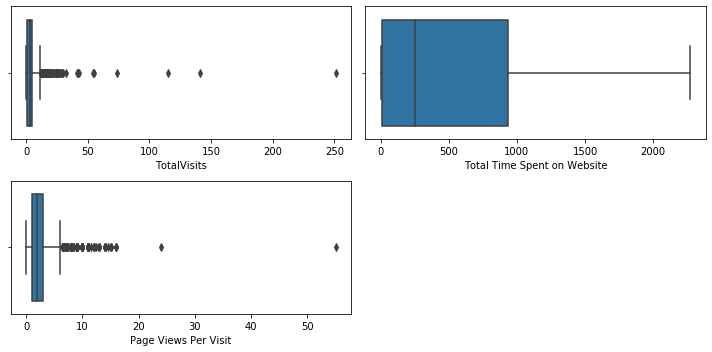

In [18]:
plt.figure(figsize=(10,5))
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
i=1
for col in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(leads_df[col])
    i = i+1
plt.tight_layout()
plt.show()

#### Imputation

In [19]:
def impute_with_median(col):
    leads_df[col] = leads_df[col].fillna(leads_df[col].median())

In [20]:
impute_with_median('TotalVisits')
impute_with_median('Total Time Spent on Website')
impute_with_median('Page Views Per Visit')

In [21]:
leads_df = leads_df[~leads_df['Lead Source'].isnull()]

In [22]:
get_null_percentage()

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              1.10
Country                                   26.36
Specialization                            36.42
What is your current occupation           29.23
Tags                                      36.31
City                                      39.53
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [23]:
#Dropping City and Country as country has more values for India and will make the model bias
#Similarly City is not providing any information clearly from Business Perspective
leads_df = leads_df.drop(['City','Country'], axis=1)

In [24]:
leads_df['A free copy of Mastering The Interview'].value_counts()

No     6316
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [25]:
# converting Yes to 1 and No to 0
leads_df['A free copy of Mastering The Interview'] = leads_df['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

### Dummy Variables

In [26]:
leads_df.select_dtypes(['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Last Notable Activity'],
      dtype='object')

In [27]:
#rem_cat_cols = leads_df.select_dtypes(['object']).columns

#for col in rem_cat_cols:
#    dummy = pd.get_dummies(leads_df[col], prefix=col, drop_first=True)
#    leads_df = pd.concat([leads_df, dummy], axis=1)
    
#leads_df = leads_df.drop(rem_cat_cols, axis=1)
#leads_df.head()

In [28]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads_df['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Others column
lo1 = lo.drop(['Lead Origin_Others'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df, lo1], axis=1)

# Creating dummy variables for the variable 'Lead Source'.
ls = pd.get_dummies(leads_df['Lead Source'], prefix='Lead Source')
ls1 = ls.drop(['Lead Source_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ls1], axis=1)

# Creating dummy variables for the variable 'Do Not Email'.
dne = pd.get_dummies(leads_df['Do Not Email'], prefix='Do Not Email')
dne1 = dne.drop(['Do Not Email_No'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,dne1], axis=1)

# Creating dummy variables for the variable 'Last Activity'. 
la = pd.get_dummies(leads_df['Last Activity'], prefix='Last Activity')
la1 = la.drop(['Last Activity_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,la1], axis=1)

# Creating dummy variables for the variable 'Specialization'.
sp =pd.get_dummies(leads_df['Specialization'], prefix='Specialization')
sp1 = sp.drop(['Specialization_Services Excellence'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,sp1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'. 
oc = pd.get_dummies(leads_df['What is your current occupation'], prefix='Occupation')
oc1 = oc.drop(['Occupation_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,oc1], axis=1)

# Creating dummy variables for the variable 'Tags'.
tg =pd.get_dummies(leads_df['Tags'], prefix='Tags')
tg1 = tg.drop(['Tags_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,tg1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'.
lna =pd.get_dummies(leads_df['Last Notable Activity'], prefix='Last Notable Activity')
lna1 = lna.drop(['Last Notable Activity_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,lna1], axis=1)

In [29]:
#Drop orignal columns
cols_to_drop1 = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization', 'What is your current occupation', 'Tags',
       'Last Notable Activity']

In [30]:
leads_df = leads_df.drop(cols_to_drop1, axis = 1)
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 43 columns):
Converted                                           9204 non-null int64
TotalVisits                                         9204 non-null float64
Total Time Spent on Website                         9204 non-null int64
Page Views Per Visit                                9204 non-null float64
A free copy of Mastering The Interview              9204 non-null int64
Lead Origin_API                                     9204 non-null uint8
Lead Origin_Landing Page Submission                 9204 non-null uint8
Lead Source_Direct Traffic                          9204 non-null uint8
Lead Source_Google                                  9204 non-null uint8
Lead Source_Olark Chat                              9204 non-null uint8
Lead Source_Organic Search                          9204 non-null uint8
Do Not Email_Yes                                    9204 non-null uint8
Last Activity_Email Opene

### Test-Train Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Putting target to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [33]:
# Putting features to X
X = leads_df.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,5.0,674,2.5,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,2.0,1532,2.0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.0,305,1.0,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,2.0,1428,1.0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_train.loc[:,['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train.loc[:,['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.loc[:,['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].head()

C:\Users\Mohit\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2835,-0.092199,1.892235,0.287109
3088,-0.092199,-0.469942,0.287109
8413,0.308979,1.919830,1.210231
5015,-0.092199,1.459905,0.287109
5166,-0.693965,-0.896752,-1.097575


In [37]:
# checking conversion rate
round(100 * sum(leads_df['Converted'])/leads_df.shape[0],2)

38.37

We have almost 38% conversion rate

### Looking at Correlations

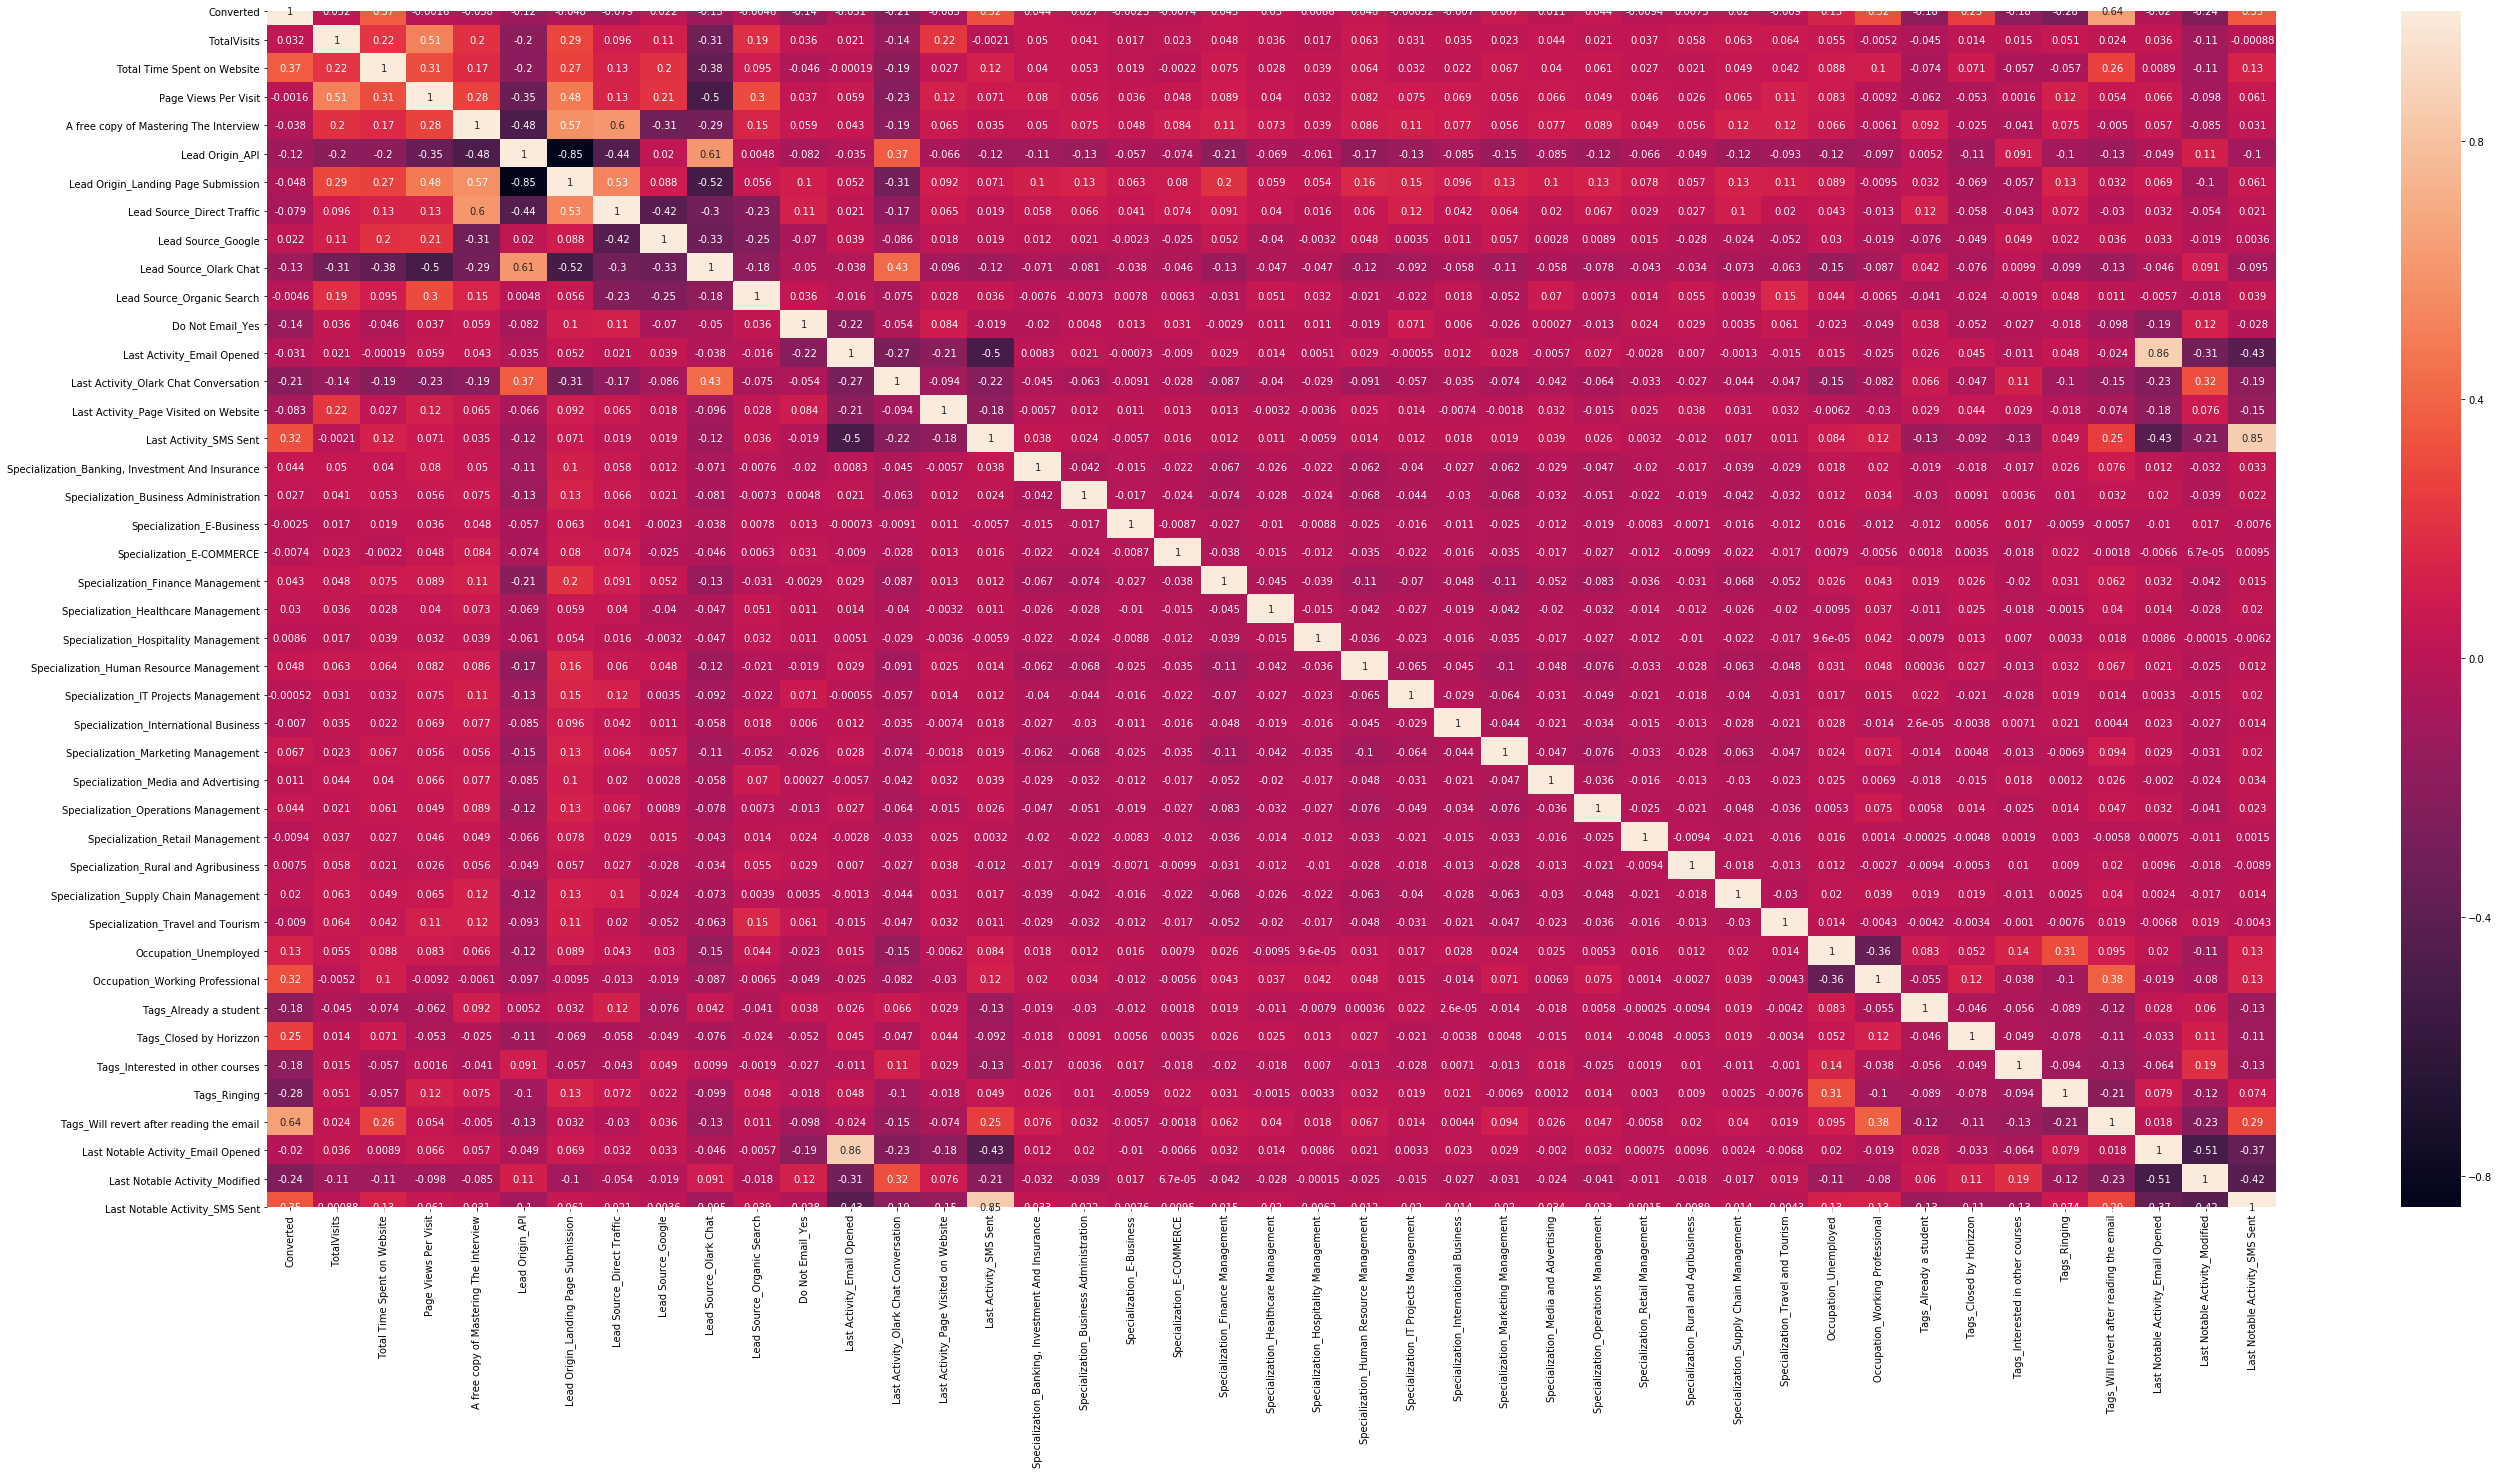

In [38]:
plt.figure(figsize=(45,22))
sns.heatmap(leads_df.corr(), annot=True)
plt.show()

In [39]:
cols_to_drop = ['Lead Origin_API', 'Last Activity_SMS Sent', 'Last Activity_Olark Chat Conversation']
X_test = X_test.drop(cols_to_drop, axis = 1)
X_train = X_train.drop(cols_to_drop, axis=1)

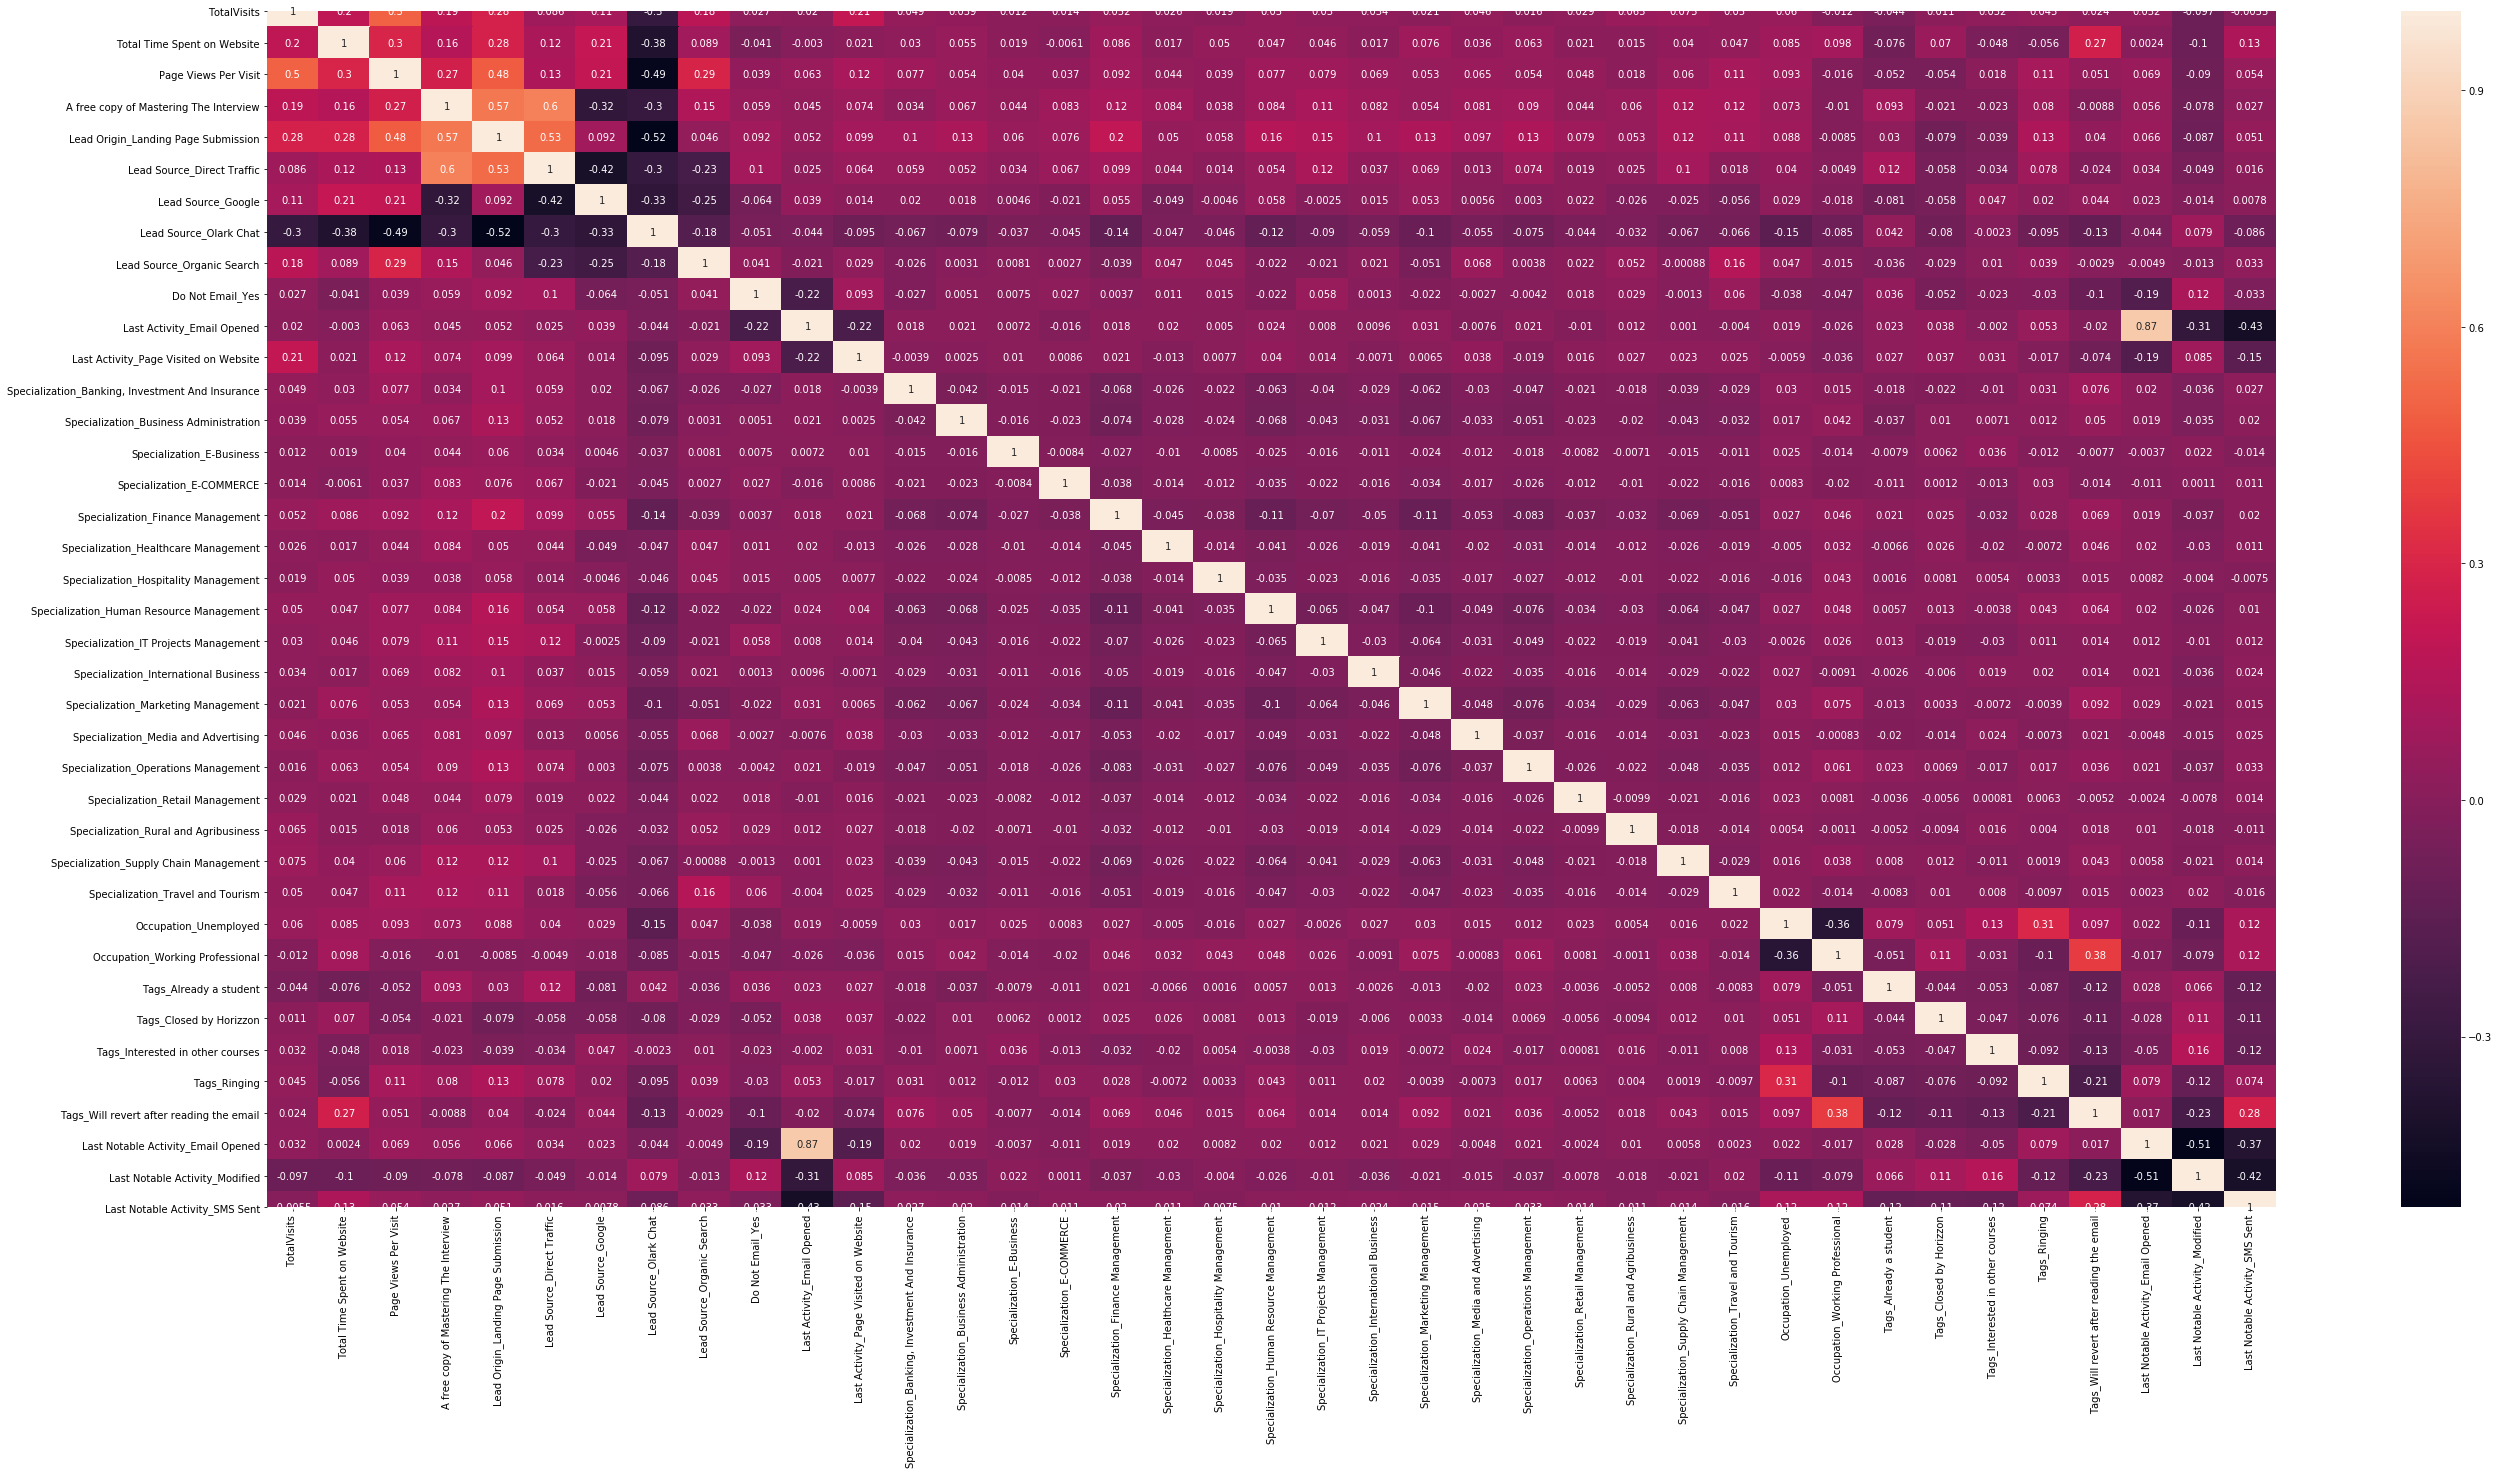

In [40]:
plt.figure(figsize=(45,22))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

### Model Building

In [41]:
import statsmodels.api as sm

In [42]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

C:\Users\Mohit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6402
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1481.5
Date:                Sun, 19 Apr 2020   Deviance:                       2962.9
Time:                        16:51:18   Pearson chi2:                 8.11e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.8104      0.269     -3.010      0.003      -1.338      -0.283
TotalVisits                                          0.1438      0.039      3.720      0.000       0.068       0.220
Total Time Spent on Website                          1.1165      0.058     19.396      0.000       1.004       1.229
Page Views Per Visit                                -0.3001      0.077     -3.890      0.000      -0.451      -0.149
A free copy of Mastering The Interview               0.2145      0.161      1.336      0.182      -0.100       0.529
Lead Origin_Landing Page Submission                 -0.3156      0.197     -1.598      0.110      -0.703       0.071
Lead Source_Direct Traffic                          -1.8291      0.245     -7.470      0.000      -2.309      -1.349
Lead Source_Google                                  -1.5835      0.210     -7.529      0.000      -1.996      -1.171
Lead Source_Olark Chat                              -0.8536      0.198     -4.304      0.000      -1.242      -0.465
Lead Source_Organic Search                          -1.7093      0.244     -7.018      0.000      -2.187      -1.232
Do Not Email_Yes                                    -1.1063      0.217     -5.088      0.000      -1.533      -0.680
Last Activity_Email Opened                           0.5497      0.211      2.604      0.009       0.136       0.963
Last Activity_Page Visited on Website               -0.3062      0.241     -1.270      0.204      -0.779       0.166
Specialization_Banking, Investment And Insurance     0.3151      0.314      1.002      0.316      -0.301       0.931
Specialization_Business Administration              -0.2134      0.298     -0.717      0.474      -0.797       0.370
Specialization_E-Business                           -0.3071      0.590     -0.521      0.603      -1.463       0.849
Specialization_E-COMMERCE                           -0.2786      0.477     -0.584      0.559      -1.213       0.656
Specialization_Finance Management                   -0.1297      0.237     -0.546      0.585      -0.595       0.336
Specialization_Healthcare Management                -0.5874      0.432     -1.360      0.174      -1.434       0.259
Specialization_Hospitality Management               -0.5170      0.501     -1.033      0.302      -1.498       0.464
Specialization_Human Resource Management            -0.1829      0.244     -0.750      0.453      -0.661       0.295
Specialization_IT Projects Management                0.0396      0.310      0.128      0.898      -0.568       0.647
Specialization_International Business               -0.4065      0.411     -0.989      0.323      -1.212       0.399
Specialization_Marketing Management      

### Step 8: Feature Selection Using RFE

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [44]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [45]:
rfe.support_

array([False,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True])

In [46]:
#chech RFE ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 15),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Specialization_Banking, Investment And Insurance', False, 3),
 ('Specialization_Business Administration', False, 21),
 ('Specialization_E-Business', False, 20),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_Finance Management', False, 25),
 ('Specialization_Healthcare Management', False, 6),
 ('Specialization_Hospitality Management', False, 8),
 ('Specialization_Human Resource Management', False, 22),
 ('Specialization_IT Projects Management', False, 16),
 ('Specialization_I

In [47]:
col = X_train.columns[rfe.support_]

In [48]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'Last Notable Activity_Email

##### Assessing the model with StatsModels

In [50]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\Users\Mohit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1510.5
Date:                Sun, 19 Apr 2020   Deviance:                       3020.9
Time:                        17:04:03   Pearson chi2:                 7.87e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0025      0.192     -5.213      0.000      -1.379      -0.626
Total Time Spent on Website                  1.0905      0.056     19.447      0.000       0.981       1.200
Lead Source_Direct Traffic                  -2.1987      0.197    -11.165      0.000      -2.585      -1.813
Lead Source_Google                          -1.9366      0.193    -10.049      0.000      -2.314      -1.559
Lead Source_Olark Chat                      -0.6946      0.191     -3.641      0.000      -1.069      -0.321
Lead Source_Organic Search                  -2.1052      0.219     -9.598      0.000      -2.535      -1.675
Do Not Email_Yes                            -1.1192      0.211     -5.309      0.000      -1.532      -0.706
Last Activity_Email Opened                   0.7812      0.115      6.816      0.000       0.557       1.006
Occupation_Unemployed                        1.1875      0.104     11.464      0.000       0.985       1.391
Occupation_Working Professional              1.2576      0.304      4.141      0.000       0.662       1.853
Tags_Already a student                      -3.5078      0.608     -5.771      0.000      -4.699      -2.316
Tags_Closed by Horizzon                      6.2415      1.016      6.144      0.000       4.250       8.233
Tags_Interested in other courses            -2.9013      0.365     -7.958      0.000      -3.616      -2.187
Tags_Ringing                                -3.6796      0.229    -16.044      0.000      -4.129      -3.230
Tags_Will revert after reading the email     3.9815      0.188     21.222      0.000       3.614       4.349
Last Notable Activity_SMS Sent               2.5613      0.130     19.679      0.000       2.306       2.816
============================================================================================================
"""

In [51]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

2835    0.998947
3088    0.002616
8413    0.939049
5015    0.894704
5166    0.064462
          ...   
5758    0.003737
5213    0.992117
5413    0.981644
861     0.028476
7297    0.997852
Length: 6442, dtype: float64

In [54]:
y_train_pred = y_train_pred.values.reshape(-1)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [56]:
y_train_pred[:10]

array([0.9989467 , 0.00261568, 0.939049  , 0.89470387, 0.06446199,
       0.00154636, 0.99803409, 0.01864999, 0.22269089, 0.00362328])

##### Creating a dataframe with the actual Converted and the predicted probabilities